In [1]:
#import libraries

from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#re-size all the images to this
Image_Size=[224,224]

#train data(images) path
train_path='C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/data/Train'

#Test data(images) path
valid_path='C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/data/Test'

In [3]:
vgg19=VGG19(input_shape=Image_Size+[3],weights='imagenet',
                  include_top=False)

#dont train existing weights
for layer in vgg19.layers:
    layer.trainable=False

In [4]:
#Gettig number of classes
folders=glob('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/data/Train/*')

In [5]:
folders

['C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/data/Train\\cats',
 'C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/data/Train\\dogs']

In [6]:
len(folders)

2

In [7]:
#our layers - you can add more layer if you want
x=Flatten()(vgg19.output)

#defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

# create a model object 

In [8]:
model=Model(inputs=vgg19.input,outputs=prediction)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
#tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
#to perform image augumentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

#training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/data/Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

print()
#testing set
print('Testing length:\n')
test_set=train_datagen.flow_from_directory('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/data/Test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Training length:

Found 202 images belonging to 2 classes.

Testing length:

Found 60 images belonging to 2 classes.


# Train the model

In [11]:
r=model.fit(training_set,
           validation_data=test_set,
           epochs=5,
           steps_per_epoch=len(training_set),
           validation_steps=len(test_set))

Epoch 1/5
7/7 [==============================] - 240s 35s/step - loss: 1.8541 - accuracy: 0.4752 - val_loss: 0.7270 - val_accuracy: 0.5833
Epoch 2/5
7/7 [==============================] - 234s 37s/step - loss: 0.8940 - accuracy: 0.6089 - val_loss: 0.9103 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 222s 32s/step - loss: 0.5879 - accuracy: 0.7624 - val_loss: 0.3558 - val_accuracy: 0.8167
Epoch 4/5
7/7 [==============================] - 332s 50s/step - loss: 0.3785 - accuracy: 0.8267 - val_loss: 0.3593 - val_accuracy: 0.8667
Epoch 5/5
7/7 [==============================] - 236s 34s/step - loss: 0.2584 - accuracy: 0.8960 - val_loss: 0.3498 - val_accuracy: 0.8167


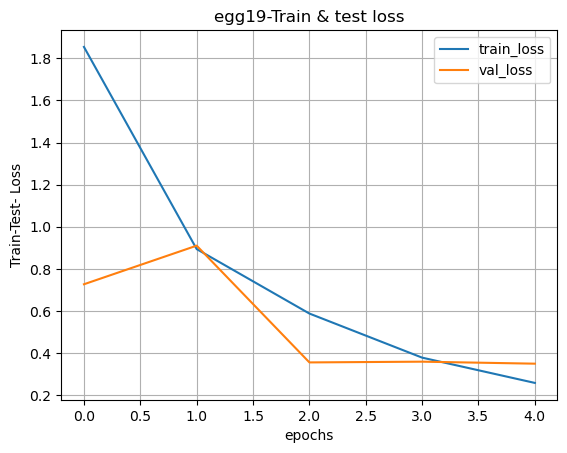

<Figure size 640x480 with 0 Axes>

In [12]:
#loss 
plt.title('egg19-Train & test loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16--Loss& val loss')

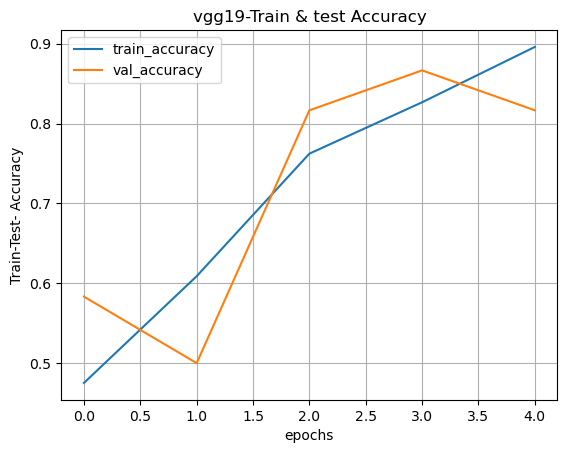

<Figure size 640x480 with 0 Axes>

In [13]:
#loss 
plt.title('vgg19-Train & test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('resnet50--Accuracy & val Accuracy')

In [14]:
#confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*75)
print('classification report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*75)
print('Accuracy score')
print(accuracy_score(test_set.classes,ypred))

2/2 [==============================] - 55s 25s/step
Confusion Matrix
[[16 14]
 [12 18]]
classification report
              precision    recall  f1-score   support

         cat       0.57      0.53      0.55        30
         dog       0.56      0.60      0.58        30

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.57        60
weighted avg       0.57      0.57      0.57        60

Accuracy score
0.5666666666666667


<Axes: >

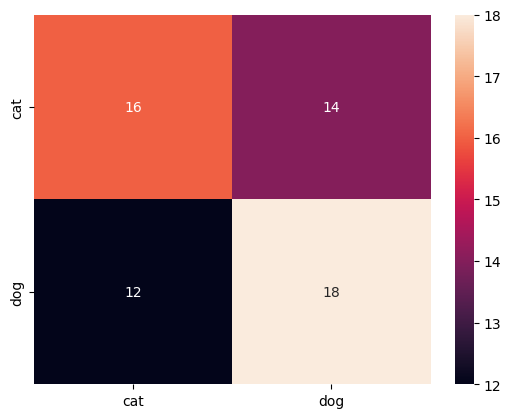

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,
           xticklabels=['cat','dog'],yticklabels=['cat','dog'])